# Read statistics about simulation pairs and plot IGM parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

### Specify suite of simulations to use and read metadata

In [2]:
basedir='../sim_suites/emulator_512_15062019/'
# label identifying the particular skewer extraction (number of skewers per side and cell width in Mpc)
skewer_label='Ns100_wM0.07'
cube_json=basedir+'/latin_hypercube.json'
with open(cube_json) as json_file:  
    cube_data = json.load(json_file)
nsamples=cube_data['nsamples']
print('# samples =',nsamples)

# samples = 6


In [3]:
cube_data

{'nsamples': 6,
 'param_space': {'heat_amp': {'ip': 0,
   'latex': '$H_A$',
   'max_val': 2.0,
   'min_val': 0.5},
  'heat_slo': {'ip': 1, 'latex': '$H_S$', 'max_val': 0.5, 'min_val': -0.5},
  'z_rei': {'ip': 2, 'latex': '$z_r$', 'max_val': 12.0, 'min_val': 6.0}},
 'samples': {'0': [0.875, -0.25, 9.5],
  '1': [1.125, 0.08333333333333326, 10.5],
  '2': [1.625, -0.08333333333333337, 8.5],
  '3': [1.375, 0.25, 7.5],
  '4': [1.875, -0.4166666666666667, 6.5],
  '5': [0.625, 0.41666666666666663, 11.5]}}

### Get information from all models simulated (simulation pairs)

In [4]:
plus_arxiv = []
minus_arxiv = []
for sample in range(nsamples):
    # store parameters for simulation pair / model
    sim_params = cube_data['samples']['%d'%sample]
    print(sample,'sim params',sim_params)
    model_dict ={'sample':sample,'sim_param':sim_params}
    # read number of snapshots 
    pair_dir=basedir+'/sim_pair_%d'%sample
    pair_json=pair_dir+'/parameter.json'
    with open(pair_json) as json_file:  
        pair_data = json.load(json_file)
    #print(sample,'pair data',pair_data)
    zs=pair_data['zs']
    Nz=len(zs)
    
    for snap in range(Nz):        
        # make sure that we actually extracted skewers for this snapshot (z < zmax)
        plus_p1d_json=pair_dir+'/sim_plus/p1d_{}_{}.json'.format(snap,skewer_label)
        if not os.path.isfile(plus_p1d_json):
            print(snap,'do not have this snapshot',plus_p1d_json)
            continue
            
        # get linear power parameters describing snapshot
        linP = pair_data['linP_zs'][snap]
        snap_dict = {'model':model_dict,'snap':snap,'z':zs[snap],'linP':linP}  
        
        # open file describing 1D power measured in snapshot for sim_plus
        with open(plus_p1d_json) as json_file: 
            plus_data = json.load(json_file)
        # open file describing 1D power measured in snapshot for sim_minus            
        minus_p1d_json=pair_dir+'/sim_minus/p1d_{}_{}.json'.format(snap,skewer_label)
        with open(minus_p1d_json) as json_file: 
            minus_data = json.load(json_file)

        # number of post-process rescalings for each snapshot
        Npp=len(plus_data['p1d_data'])
        # read info for each post-process
        for pp in range(Npp):
            plus_dict = plus_data['p1d_data'][pp]
            plus_dict['linP']=linP
            plus_dict['snap_data']=snap_dict
            plus_arxiv.append(plus_dict)
            minus_dict = minus_data['p1d_data'][pp]
            minus_dict['linP']=linP
            minus_dict['snap_data']=snap_dict
            minus_arxiv.append(minus_dict)        

0 sim params [0.875, -0.25, 9.5]
0 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_0_Ns100_wM0.07.json
1 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_1_Ns100_wM0.07.json
2 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_2_Ns100_wM0.07.json
3 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_3_Ns100_wM0.07.json
4 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_4_Ns100_wM0.07.json
5 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_5_Ns100_wM0.07.json
6 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_0/sim_plus/p1d_6_Ns100_wM0.07.json
1 sim params [1.125, 0.08333333333333326, 10.5]
0 do not have this snapshot ../sim_suites/emulator_512_15062019//sim_pair_1/sim_plus/p1d_0_Ns100_wM0.07.json
1 do not have this snapshot ../sim_suites/emula

In [5]:
Ntot=len(plus_arxiv)
plus_mF=np.array([plus_arxiv[i]['mF'] for i in range(Ntot)])
plus_T0=np.array([plus_arxiv[i]['sim_T0'] for i in range(Ntot)])
plus_gamma=np.array([plus_arxiv[i]['sim_gamma'] for i in range(Ntot)])
plus_kF=np.array([plus_arxiv[i]['kF_Mpc'] for i in range(Ntot)])
minus_mF=np.array([minus_arxiv[i]['mF'] for i in range(Ntot)])
minus_T0=np.array([minus_arxiv[i]['sim_T0'] for i in range(Ntot)])
minus_gamma=np.array([minus_arxiv[i]['sim_gamma'] for i in range(Ntot)])
minus_kF=np.array([minus_arxiv[i]['kF_Mpc'] for i in range(Ntot)])
z=np.array([minus_arxiv[i]['snap_data']['z'] for i in range(Ntot)])

Text(0.5, 1.0, 'Mean flux in paired simulations')

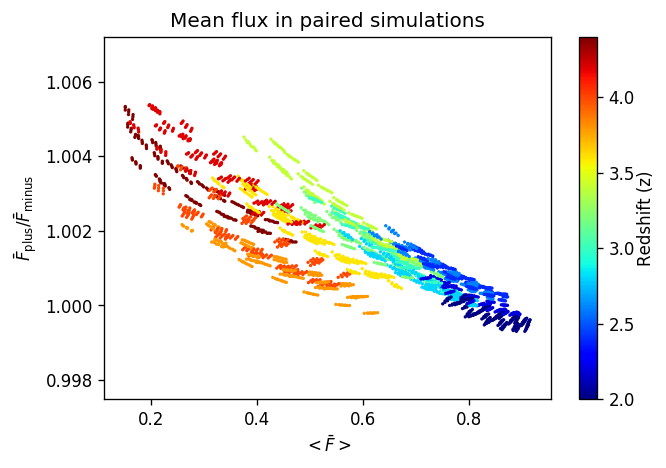

In [6]:
plt.figure()
plt.scatter(0.5*(plus_mF+minus_mF),plus_mF/minus_mF,c=z,s=1,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$< \bar F>$')
plt.ylabel(r'$\bar F_{\rm plus}/ \bar F_{\rm minus}$')
plt.title('Mean flux in paired simulations')

Text(0.5, 1.0, 'Mean temperature in paired simulations')

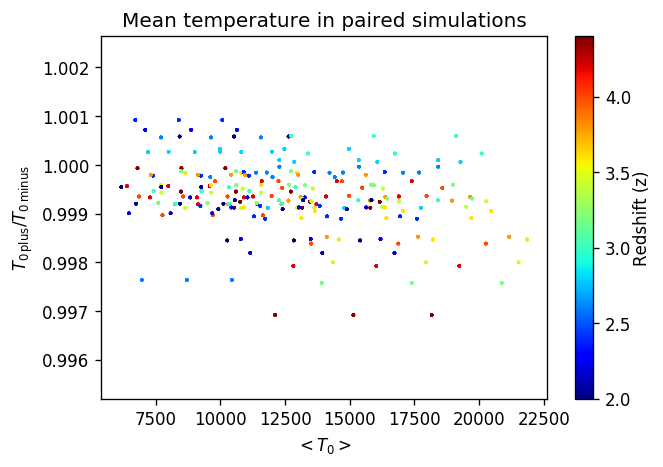

In [7]:
plt.figure()
plt.scatter(0.5*(plus_T0+minus_T0),plus_T0/minus_T0,c=z,s=1,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$<T_0>$')
plt.ylabel(r'$T_{0 \, \rm plus} / T_{0 \, \rm minus}$')
plt.title('Mean temperature in paired simulations')

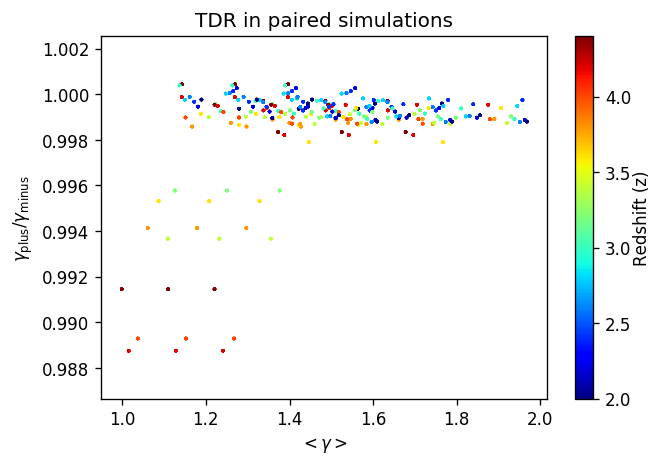

In [8]:
plt.figure()
plt.scatter(0.5*(plus_gamma+minus_gamma),plus_gamma/minus_gamma,c=z,s=1,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$<\gamma>$')
plt.ylabel(r'$\gamma_{\rm plus} / \gamma_{\rm minus}$')
plt.title('TDR in paired simulations');

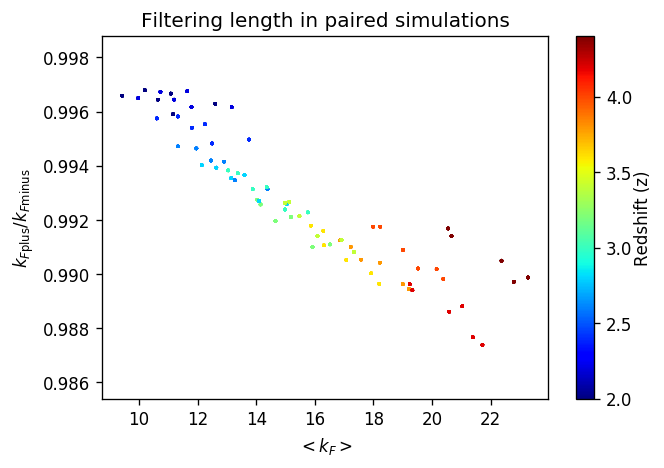

In [9]:
plt.figure()
plt.scatter(0.5*(plus_kF+minus_kF),plus_kF/minus_kF,c=z,s=1,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$<k_F>$')
plt.ylabel(r'$k_{F\rm plus} / k_{F\rm minus}$')
plt.title('Filtering length in paired simulations');